In [1]:
import uproot
import numpy as np
from tqdm import tqdm
import pandas as pd
from pathlib import Path
import awkward as ak

In [3]:
rpath = Path(
    "/scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/lst_data_v0/root/LSTNtuple_MLTraining_v1.root"
)

In [4]:
tree = uproot.open(rpath)["tree"]

In [15]:
s = []
for i in tqdm(range(100)):
    pid = tree["MD_sim_idx"].array()[i].to_numpy()
    pt = tree["MD_sim_pt"].array()[i].to_numpy()
    s.extend(pd.Series(pid[pt > 0.9]).value_counts().to_list())

100%|██████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  3.00it/s]


(array([ 4858.,  7061.,  5823.,  5250.,  8163., 21190., 24631., 19167.,
        11638.,  5476.,  2361.,   891.,   554.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14.]),
 <BarContainer object of 13 artists>)

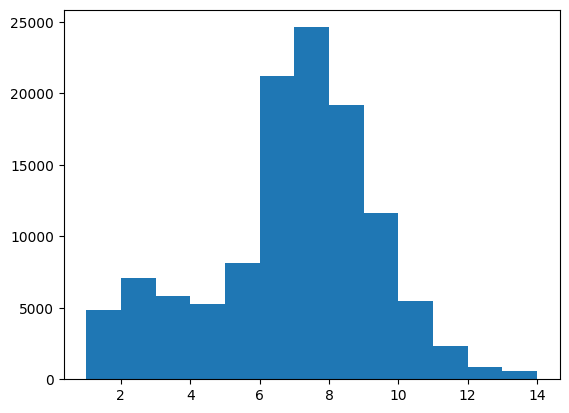

In [16]:
from matplotlib import pyplot as plt

plt.hist(s, bins=range(1, 15))

In [32]:
import torch
from gnn_tracking.analysis.graphs import get_track_graph_info_from_data

dpath = Path(
    "/scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/lst_data_v0/processed"
)

df_cut = get_track_graph_info_from_data(
    data=torch.load(dpath / "0001.pt"),
    pt_thld=0.9,
)

<Axes: >

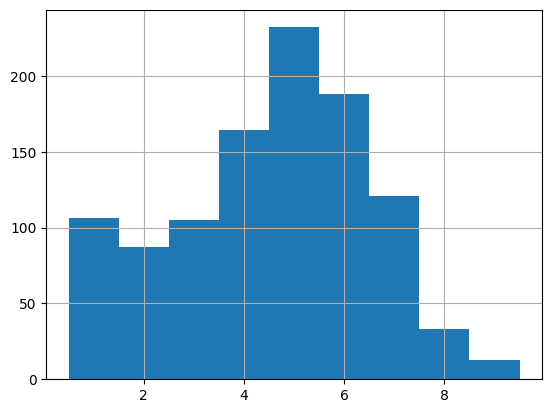

In [33]:
df_cut["n_hits_largest_segment"].hist(bins=np.arange(0.5, 10.5))

<Axes: >

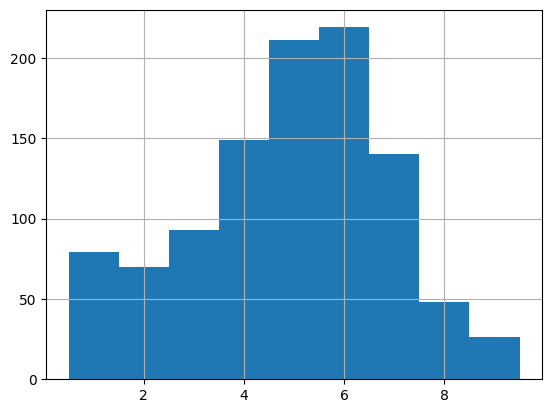

In [34]:
df_cut["n_hits_largest_component"].hist(bins=np.arange(0.5, 10.5))

In [37]:
(df_cut["n_hits_largest_segment"] < 3).mean()

0.182247403210576

In [38]:
(df_cut["n_hits_largest_component"] < 3).mean()

0.14069877242681775